In [1]:
import nltk
import os
nltk_data_dir = os.path.join(os.path.dirname(__file__), "nltk_data")
if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)

nltk.data.path.append(nltk_data_dir)

In [2]:
from text_preprocessing import TextPreprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stopword not found, downloading...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:/Users/Acer/Documents/ideas/Porto3/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:/Users/Acer/Documents/ideas/Porto3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = pd.read_csv("review_product.csv")
display(df)

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
0                 0             0           1   
1                 1             1           2   
2                 2             2           3   
3                 3             3           4   
4                 4             4           5   
...             ...           ...         ...   
40592         40602         40602       40889   
40593         40603         40603       40890   
40594         40604         40604       40891   
40595         40605         40605       40892   
40596         40606         40606       40893   

                                                    text  rating     category  \
0                 Barang sesuai pesanan dan cepat sampai       5  pertukangan   
1                               Barang bagus harga murah       5  pertukangan   
2        Paket rapi...mantap....cepat....sampe ke tujuan       5  pertukangan   
3                             ya saya puas dgn barangnya       5  pertukangan   
4                           Responya luar biasa b mantap       5  pertukangan   
...                                                  ...     ...          ...   
40592                gak bisa ditutup.. ukuran gak pas..       1     olahraga   
40593  Penjual krg peduli dan brg jelek. Brg yg dikir...       1     olahraga   
40594  pelayanan kurang sigap, berhari2 dr nanya baik...       1     olahraga   
40595  barang yg dikirim tsk sesuai wrn, kl memang dr...       1     olahraga   
40596  Pihak penjual memberikan respon yang buruk kep...       1     olahraga   

                                            product_name  product_id   sold  \
0      Staples Dekorasi Staples Kayu + Refill 8mm - S...   418660637      1   
1      STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   416032545     11   
2      STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   416032545     11   
3      ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...   102279869      5   
4      Isi Refill Staples Jok Kulit Motor / Staple Gu...   190679689    787   
...                                                  ...         ...    ...   
40592  MINERAL WATER POT WATER PURIFIER 28 liter BIO ...   144442054      2   
40593  PANCI PRESTO IDEALIFE 7 LITER - IL 707 &#40; I...   313781913      1   
40594  EXCIDER BIKE 2 - sepeda fitnes magnetic lipat ...    71873370      1   
40595  TOTAL FITNES ALAT FITNESS SIT UP BENCH TOTAL &...   201690705      2   
40596  SIT UP BENCH HITAM 3 SISI - SITUP BANCH INCLIN...    78857201          

       shop_id                                        product_url  
0      1740837  https://www.tokopedia.com/shakaonline87/staple...  
1      1477109  https://www.tokopedia.com/juraganperkakas/stap...  
2      1477109  https://www.tokopedia.com/juraganperkakas/stap...  
3       771395  https://www.tokopedia.com/kamarmesin/alat-stap...  
4       969999  https://www.tokopedia.com/mitrapersada/isi-ref...  
...        ...                                                ...  
40592   648559  https://www.tokopedia.com/pusatdermawand/miner...  
40593   648559  https://www.tokopedia.com/pusatdermawand/panci...  
40594   648559  https://www.tokopedia.com/pusatdermawand/excid...  
40595   648559  https://www.tokopedia.com/pusatdermawand/total...  
40596   648559  https://www.tokopedia.com/pusatdermawand/sit-u...  

[40597 rows x 11 columns]

In [4]:
df_raw = df[["text", "rating", "category", "product_name"]].copy()
display(df_raw.head())
print("-"*40)
display(df_raw.info())

text  rating     category  \
0           Barang sesuai pesanan dan cepat sampai       5  pertukangan   
1                         Barang bagus harga murah       5  pertukangan   
2  Paket rapi...mantap....cepat....sampe ke tujuan       5  pertukangan   
3                       ya saya puas dgn barangnya       5  pertukangan   
4                     Responya luar biasa b mantap       5  pertukangan   

                                        product_name  
0  Staples Dekorasi Staples Kayu + Refill 8mm - S...  
1  STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...  
2  STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...  
3  ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...  
4  Isi Refill Staples Jok Kulit Motor / Staple Gu...

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40597 entries, 0 to 40596
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          40597 non-null  object
 1   rating        40597 non-null  int64 
 2   category      40597 non-null  object
 3   product_name  40597 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


None

In [5]:
df_raw.isna().sum()

text            0
rating          0
category        0
product_name    0
dtype: int64

In [6]:
txt_preprocessing = TextPreprocessing()

In [7]:
df_raw['cleaned_text'] = df_raw['text'].apply(txt_preprocessing.lowercase)
df_raw['cleaned_text'] = df_raw['cleaned_text'].apply(txt_preprocessing.text_cleaning)
df_raw['cleaned_text'] = df_raw['cleaned_text'].apply(txt_preprocessing.stopword_removal,lib="kumparan")
df_raw['cleaned_text'] = df_raw['cleaned_text'].apply(txt_preprocessing.slang_transforming)

# df_raw['cleaned_text'] = df['text'].replace('\.+',' ',regex=True)
display(df_raw)

text  rating     category  \
0                 Barang sesuai pesanan dan cepat sampai       5  pertukangan   
1                               Barang bagus harga murah       5  pertukangan   
2        Paket rapi...mantap....cepat....sampe ke tujuan       5  pertukangan   
3                             ya saya puas dgn barangnya       5  pertukangan   
4                           Responya luar biasa b mantap       5  pertukangan   
...                                                  ...     ...          ...   
40592                gak bisa ditutup.. ukuran gak pas..       1     olahraga   
40593  Penjual krg peduli dan brg jelek. Brg yg dikir...       1     olahraga   
40594  pelayanan kurang sigap, berhari2 dr nanya baik...       1     olahraga   
40595  barang yg dikirim tsk sesuai wrn, kl memang dr...       1     olahraga   
40596  Pihak penjual memberikan respon yang buruk kep...       1     olahraga   

                                            product_name  \
0      Staples Dekorasi Staples Kayu + Refill 8mm - S...   
1      STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   
2      STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   
3      ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...   
4      Isi Refill Staples Jok Kulit Motor / Staple Gu...   
...                                                  ...   
40592  MINERAL WATER POT WATER PURIFIER 28 liter BIO ...   
40593  PANCI PRESTO IDEALIFE 7 LITER - IL 707 &#40; I...   
40594  EXCIDER BIKE 2 - sepeda fitnes magnetic lipat ...   
40595  TOTAL FITNES ALAT FITNESS SIT UP BENCH TOTAL &...   
40596  SIT UP BENCH HITAM 3 SISI - SITUP BANCH INCLIN...   

                                            cleaned_text  
0                            barang sesuai pesanan cepat  
1                               barang bagus harga murah  
2                  paket rapi mantap cepat sampai tujuan  
3                                  puas dengan barangnya  
4                                      responya b mantap  
...                                                  ...  
40592                             gak ditutup ukuran gak  
40593  penjual kurang peduli bareng jelek bareng diki...  
40594  pelayanan sigap berhari dari smpe kesel baru d...  
40595  barang dikirim tsk sesuai wrn kalau dari wrn t...  
40596  penjual respon buruk pembeli penjual pemeriksa...  

[40597 rows x 5 columns]

In [8]:

with  open("positif_ta2.txt") as positive_file:
    positive_words = list(set(positive_file.readlines()))
with open("negatif_ta2.txt","r") as negative_file :
    negative_words = list(set(negative_file.readlines()))

def sentiment_count(data):
    good_count = 0
    bad_count = 0

    for good_word in positive_words:
        count = data.count(good_word.strip().lower())
        if count > 0:
            print(f"good word: {good_word.strip()}")
            good_count += count
    for bad_word in negative_words:
        count = data.count(bad_word.strip().lower())
        if count > 0:
            print(f"bad word: {bad_word.strip()}")
            bad_count += count

    print(f"positif: {good_count}")
    print(f"negatif: {bad_count}")

    return good_count-bad_count    

In [9]:
df_raw["count"] = df_raw["cleaned_text"].apply(sentiment_count)

good word: cepat
good word: sesuai
positif: 2
negatif: 0
good word: murah
good word: bagus
positif: 2
negatif: 0
good word: rapi
good word: cepat
good word: mantap
positif: 3
negatif: 0
good word: puas
positif: 1
negatif: 0
good word: mantap
positif: 1
negatif: 0
good word: cepat
good word: iman
bad word: iri
positif: 2
negatif: 1
good word: cepat
good word: iman
bad word: iri
positif: 2
negatif: 1
good word: cepat
good word: sesuai
positif: 2
negatif: 0
good word: kasih
good word: terima kasih
good word: cepat
good word: bagus
good word: sesuai
good word: iman
bad word: iri
positif: 7
negatif: 1
good word: cepat
good word: mantap
good word: pelayanan
positif: 3
negatif: 0
good word: sesuai
positif: 1
negatif: 0
good word: kasih
good word: rapi
good word: terima kasih
good word: sayang
good word: bagus
bad word: sara
bad word: iri
bad word: hambur
bad word: tembak
positif: 5
negatif: 4
good word: kasih
good word: terima kasih
good word: cepat
good word: sesuai
positif: 4
negatif: 0
pos

In [10]:
display(df_raw)

text  rating     category  \
0                 Barang sesuai pesanan dan cepat sampai       5  pertukangan   
1                               Barang bagus harga murah       5  pertukangan   
2        Paket rapi...mantap....cepat....sampe ke tujuan       5  pertukangan   
3                             ya saya puas dgn barangnya       5  pertukangan   
4                           Responya luar biasa b mantap       5  pertukangan   
...                                                  ...     ...          ...   
40592                gak bisa ditutup.. ukuran gak pas..       1     olahraga   
40593  Penjual krg peduli dan brg jelek. Brg yg dikir...       1     olahraga   
40594  pelayanan kurang sigap, berhari2 dr nanya baik...       1     olahraga   
40595  barang yg dikirim tsk sesuai wrn, kl memang dr...       1     olahraga   
40596  Pihak penjual memberikan respon yang buruk kep...       1     olahraga   

                                            product_name  \
0      Staples Dekorasi Staples Kayu + Refill 8mm - S...   
1      STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   
2      STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   
3      ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...   
4      Isi Refill Staples Jok Kulit Motor / Staple Gu...   
...                                                  ...   
40592  MINERAL WATER POT WATER PURIFIER 28 liter BIO ...   
40593  PANCI PRESTO IDEALIFE 7 LITER - IL 707 &#40; I...   
40594  EXCIDER BIKE 2 - sepeda fitnes magnetic lipat ...   
40595  TOTAL FITNES ALAT FITNESS SIT UP BENCH TOTAL &...   
40596  SIT UP BENCH HITAM 3 SISI - SITUP BANCH INCLIN...   

                                            cleaned_text  count  
0                            barang sesuai pesanan cepat      2  
1                               barang bagus harga murah      2  
2                  paket rapi mantap cepat sampai tujuan      3  
3                                  puas dengan barangnya      1  
4                                      responya b mantap      1  
...                                                  ...    ...  
40592                             gak ditutup ukuran gak     -1  
40593  penjual kurang peduli bareng jelek bareng diki...     -2  
40594  pelayanan sigap berhari dari smpe kesel baru d...      2  
40595  barang dikirim tsk sesuai wrn kalau dari wrn t...     -5  
40596  penjual respon buruk pembeli penjual pemeriksa...     -4  

[40597 rows x 6 columns]

In [11]:
def sentimen(data:int):
  if data > 0:
    return "positif"
  elif data < 0:
    return "negatif"
  else:
    return "netral"

In [22]:
df_raw["sentimen"] = df_raw["count"].apply(sentimen)
display(df_raw)

text  rating     category  \
0                 Barang sesuai pesanan dan cepat sampai       5  pertukangan   
1                               Barang bagus harga murah       5  pertukangan   
2        Paket rapi...mantap....cepat....sampe ke tujuan       5  pertukangan   
3                             ya saya puas dgn barangnya       5  pertukangan   
4                           Responya luar biasa b mantap       5  pertukangan   
...                                                  ...     ...          ...   
40592                gak bisa ditutup.. ukuran gak pas..       1     olahraga   
40593  Penjual krg peduli dan brg jelek. Brg yg dikir...       1     olahraga   
40594  pelayanan kurang sigap, berhari2 dr nanya baik...       1     olahraga   
40595  barang yg dikirim tsk sesuai wrn, kl memang dr...       1     olahraga   
40596  Pihak penjual memberikan respon yang buruk kep...       1     olahraga   

                                            product_name  \
0      Staples Dekorasi Staples Kayu + Refill 8mm - S...   
1      STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   
2      STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   
3      ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...   
4      Isi Refill Staples Jok Kulit Motor / Staple Gu...   
...                                                  ...   
40592  MINERAL WATER POT WATER PURIFIER 28 liter BIO ...   
40593  PANCI PRESTO IDEALIFE 7 LITER - IL 707 &#40; I...   
40594  EXCIDER BIKE 2 - sepeda fitnes magnetic lipat ...   
40595  TOTAL FITNES ALAT FITNESS SIT UP BENCH TOTAL &...   
40596  SIT UP BENCH HITAM 3 SISI - SITUP BANCH INCLIN...   

                                            cleaned_text  count sentimen  \
0                            barang sesuai pesanan cepat      2  positif   
1                               barang bagus harga murah      2  positif   
2                  paket rapi mantap cepat sampai tujuan      3  positif   
3                                  puas dengan barangnya      1  positif   
4                                      responya b mantap      1  positif   
...                                                  ...    ...      ...   
40592                             gak ditutup ukuran gak     -1  negatif   
40593  penjual kurang peduli bareng jelek bareng diki...     -2  negatif   
40594  pelayanan sigap berhari dari smpe kesel baru d...      2  positif   
40595  barang dikirim tsk sesuai wrn kalau dari wrn t...     -5  negatif   
40596  penjual respon buruk pembeli penjual pemeriksa...     -4  negatif   

       count_id  
0        0.8750  
1        0.8402  
2        0.9517  
3        0.6124  
4        0.7184  
...         ...  
40592    0.0000  
40593   -0.8402  
40594    0.9432  
40595    0.8750  
40596   -0.9325  

[40597 rows x 8 columns]

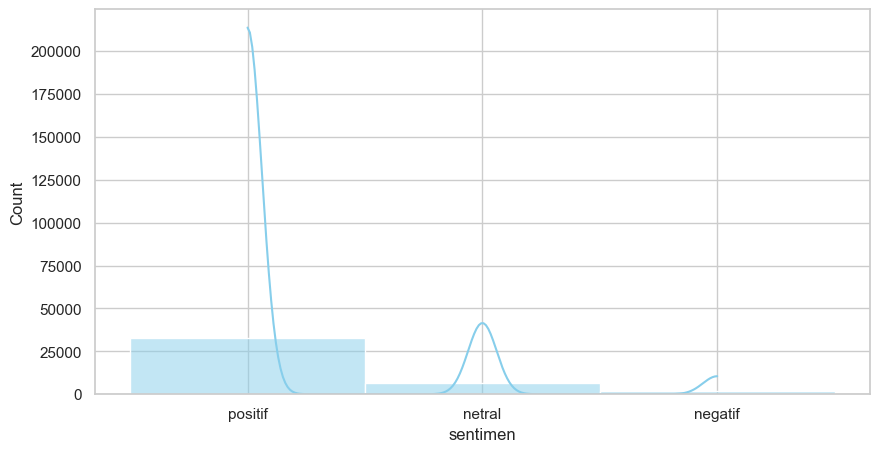

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))

hist_plot = sns.histplot(df_raw, x='sentimen', kde=True, color='skyblue')

plt.show()

In [14]:
#second method
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json, reprlib
nltk_data_dir = os.path.join(os.path.dirname(__file__), "nltk_data")

try:
    nltk.data.find("nltk_data/sentiment/vader_lexicon.zip")
except:
    print("no vader lexicon, downloading...")
    nltk.download("vader_lexicon", download_dir=nltk_data_dir)

no vader lexicon, downloading...


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:/Users/Acer/Documents/ideas/Porto3/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
sentiment_analyzer_ind = SentimentIntensityAnalyzer()
sentiment_analyzer_ind.lexicon.clear()

In [16]:
def load_sentiment(file_path):
    sentiment_dict={}

    with open(file_path, 'r') as file:
        for line in file:
            word, score = line.strip().split(':')
            sentiment_dict[word] = int(score)
    return sentiment_dict
sentiwords = load_sentiment("sentiwords_id.txt")
print(sentiwords)

{'abadi': 5, 'absen': -3, 'abu-abu': -1, 'acuh': 4, 'adil': 5, 'aduh': -2, 'agresi': -5, 'aib': -5, 'ajaib': 3, 'ajar': 4, 'akal': 4, 'alasan': -2, 'alibi': -4, 'alien': -1, 'aman': 4, 'ambigu': -3, 'ambisi': -2, 'amoral': -5, 'anarki': -5, 'anarkis': -5, 'ancaman': -5, 'aneh': -2, 'anggun': 4, 'angkuh': -5, 'anjing': -4, 'anomali': -3, 'antagoni': -4, 'anti-sosial': -4, 'antipati': -5, 'apes': -4, 'api': -1, 'arogan': -5, 'asam': -1, 'asap': -2, 'asing': -4, 'asli': 4, 'asmara': 4, 'astaga': -5, 'asyik': 4, 'autentik': 4, 'aversi': -4, 'awas': -4, 'awur': -4, 'ayam': 1, 'ayu': 4, 'azab': -5, 'babu': -5, 'bacot': -5, 'badai': -4, 'badut': -2, 'bagus': 4, 'bahagia': 4, 'bahaya': -4, 'baik': 4, 'bail': -2, 'bajingan': -5, 'bakat': 3, 'banci': -4, 'bandel': -4, 'bandit': -4, 'bangga': 4, 'bangkrut': -5, 'banjir': -4, 'barbari': -5, 'basi': -4, 'batu': -1, 'bau': -4, 'baut': 1, 'bawaan': -1, 'bawah': -1, 'bayaran': -3, 'beban': -2, 'bego': -5, 'bekas': -4, 'bekicot': -4, 'belahan': -1, 'be

In [17]:
sentiment_analyzer_ind.lexicon.update(sentiwords)
print(reprlib.repr(sentiment_analyzer_ind.lexicon))

{'abadi': 5, 'absen': -3, 'abu-abu': -1, 'acuh': 4, ...}


In [18]:
print(sentiment_analyzer_ind.polarity_scores("saya senang"))

{'neg': 0.0, 'neu': 0.167, 'pos': 0.833, 'compound': 0.7184}


In [23]:
df_raw['count_id'] = df_raw["cleaned_text"].apply(sentiment_analyzer_ind.polarity_scores)
df_raw['count_id'] = df_raw["count_id"].apply(lambda x:x['compound'])
df_raw["sentimen_id"] = df_raw["count_id"].apply(sentimen)
display(df_raw)

text  rating     category  \
0                 Barang sesuai pesanan dan cepat sampai       5  pertukangan   
1                               Barang bagus harga murah       5  pertukangan   
2        Paket rapi...mantap....cepat....sampe ke tujuan       5  pertukangan   
3                             ya saya puas dgn barangnya       5  pertukangan   
4                           Responya luar biasa b mantap       5  pertukangan   
...                                                  ...     ...          ...   
40592                gak bisa ditutup.. ukuran gak pas..       1     olahraga   
40593  Penjual krg peduli dan brg jelek. Brg yg dikir...       1     olahraga   
40594  pelayanan kurang sigap, berhari2 dr nanya baik...       1     olahraga   
40595  barang yg dikirim tsk sesuai wrn, kl memang dr...       1     olahraga   
40596  Pihak penjual memberikan respon yang buruk kep...       1     olahraga   

                                            product_name  \
0      Staples Dekorasi Staples Kayu + Refill 8mm - S...   
1      STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   
2      STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...   
3      ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...   
4      Isi Refill Staples Jok Kulit Motor / Staple Gu...   
...                                                  ...   
40592  MINERAL WATER POT WATER PURIFIER 28 liter BIO ...   
40593  PANCI PRESTO IDEALIFE 7 LITER - IL 707 &#40; I...   
40594  EXCIDER BIKE 2 - sepeda fitnes magnetic lipat ...   
40595  TOTAL FITNES ALAT FITNESS SIT UP BENCH TOTAL &...   
40596  SIT UP BENCH HITAM 3 SISI - SITUP BANCH INCLIN...   

                                            cleaned_text  count sentimen  \
0                            barang sesuai pesanan cepat      2  positif   
1                               barang bagus harga murah      2  positif   
2                  paket rapi mantap cepat sampai tujuan      3  positif   
3                                  puas dengan barangnya      1  positif   
4                                      responya b mantap      1  positif   
...                                                  ...    ...      ...   
40592                             gak ditutup ukuran gak     -1  negatif   
40593  penjual kurang peduli bareng jelek bareng diki...     -2  negatif   
40594  pelayanan sigap berhari dari smpe kesel baru d...      2  positif   
40595  barang dikirim tsk sesuai wrn kalau dari wrn t...     -5  negatif   
40596  penjual respon buruk pembeli penjual pemeriksa...     -4  negatif   

       count_id sentimen_id  
0        0.8750     positif  
1        0.8402     positif  
2        0.9517     positif  
3        0.6124     positif  
4        0.7184     positif  
...         ...         ...  
40592    0.0000      netral  
40593   -0.8402     negatif  
40594    0.9432     positif  
40595    0.8750     positif  
40596   -0.9325     negatif  

[40597 rows x 9 columns]

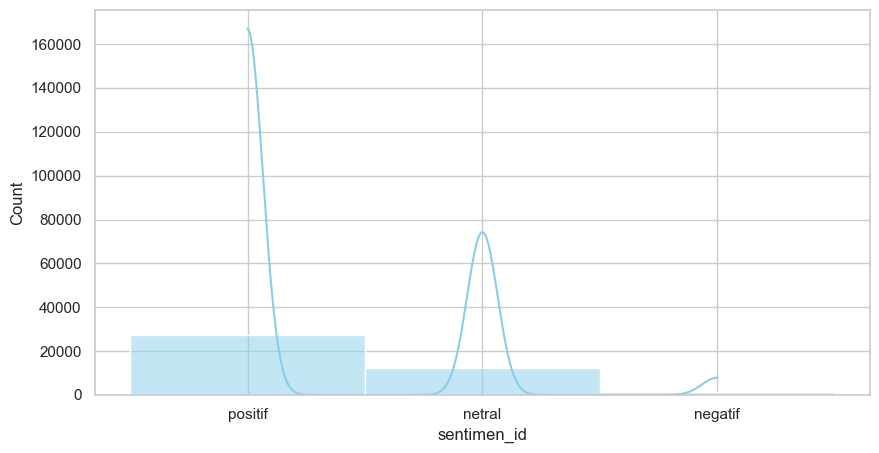

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))

hist_plot = sns.histplot(df_raw, x='sentimen_id', kde=True, color='skyblue')

plt.show()